In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
DATADIR = './data/'

In [48]:
for filename in os.listdir(DATADIR):
    print(filename)


driverdemographics.csv
factorsinroadcrashes.csv
locations.csv
restrainthelmetuse.csv
roadcasualties.csv
vehicleinvolvement.csv


In [ ]:
for filename in os.listdir(DATADIR):
    print(filename)
    data = pd.read_csv(DATADIR + filename)
    print("data.shape:", data.shape)
    print("column names : ", list(data))
    #get column names for non numeric features
    print("non numeric features :", data.select_dtypes(exclude=['int', 'float']).columns)
    nonNumFeatures = list(data.select_dtypes(exclude=['int', 'float']).columns)
    print("type(nonNumFeatures):", type(nonNumFeatures))
    for colname in nonNumFeatures:
        print("colname:", colname)
        print("unique values in column '"+colname+"' \n")
        print(data[colname].unique())
        print("_____________________")
    #get column names of numerical features
    #print("numeric features:", data.select_dtypes(include=['int', 'float']).columns)
    print("_________________________________________")


In [43]:
"""
driverdemographics.csv
chart 'Crash_Year' vs 'Crash_Severity'
"""
data = pd.read_csv(DATADIR + 'driverdemographics.csv')
print("data.shape:", data.shape)
print(list(data))

data.shape: (14198, 16)
['Crash_Year', 'Crash_Police_Region', 'Crash_Severity', 'Involving_Male_Driver', 'Involving_Female_Driver', 'Involving_Young_Driver_16-24', 'Involving_Senior_Driver_60plus', 'Involving_Provisional_Driver', 'Involving_Overseas_Licensed_Driver', 'Involving_Unlicensed_Driver', 'Count_Crashes', 'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised', 'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury', 'Count_Casualty_All']


In [16]:
print(data.head(5))

   Crash_Year Crash_Police_Region Crash_Severity Involving_Male_Driver  \
0        2001            Brisbane          Fatal                    No   
1        2001            Brisbane          Fatal                    No   
2        2001            Brisbane          Fatal                    No   
3        2001            Brisbane          Fatal                    No   
4        2001            Brisbane          Fatal                    No   

  Involving_Female_Driver Involving_Young_Driver_16-24  \
0                      No                           No   
1                     Yes                           No   
2                     Yes                           No   
3                     Yes                           No   
4                     Yes                           No   

  Involving_Senior_Driver_60plus Involving_Provisional_Driver  \
0                             No                           No   
1                             No                           No   
2          

In [9]:
print(list(data))

df = data[['Crash_Year', 'Crash_Severity']]

['Crash_Year', 'Crash_Police_Region', 'Crash_Severity', 'Involving_Male_Driver', 'Involving_Female_Driver', 'Involving_Young_Driver_16-24', 'Involving_Senior_Driver_60plus', 'Involving_Provisional_Driver', 'Involving_Overseas_Licensed_Driver', 'Involving_Unlicensed_Driver', 'Count_Crashes', 'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised', 'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury', 'Count_Casualty_All']


In [18]:
crashes_yr = df.groupby(['Crash_Year']).size().to_frame('count').reset_index()
crashes_yr

,Crash_Year,count
0,2001,983
1,2002,979
2,2003,973
3,2004,991
4,2005,993
5,2006,934
6,2007,909
7,2008,963
8,2009,924
9,2010,920


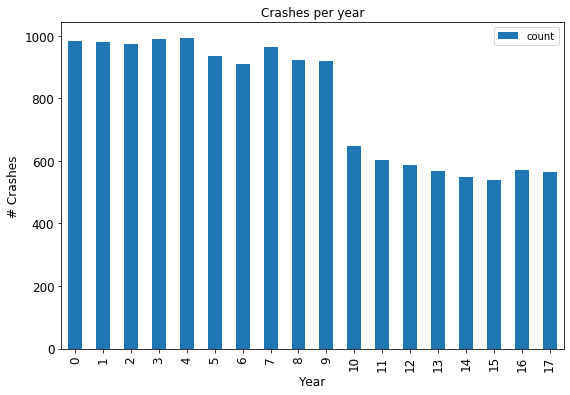

In [15]:
ax = crashes_yr['count'].plot(kind='bar', title ="Crashes per year", figsize=(9, 6), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("# Crashes", fontsize=12)
plt.show()

In [20]:
crashes_yr_type = df.groupby(['Crash_Year', 'Crash_Severity']).size().to_frame('count').reset_index()
crashes_yr_type.head(10)

,Crash_Year,Crash_Severity,count
0,2001,Fatal,88
1,2001,Hospitalisation,226
2,2001,Medical treatment,231
3,2001,Minor injury,190
4,2001,Property damage only,248
5,2002,Fatal,85
6,2002,Hospitalisation,212
7,2002,Medical treatment,222
8,2002,Minor injury,199
9,2002,Property damage only,261


In [22]:
df = crashes_yr_type.pivot(index='Crash_Year', columns='Crash_Severity', values='count')
df.head(10)

Crash_Severity,Fatal,Hospitalisation,Medical treatment,Minor injury,Property damage only
Crash_Year,,,,,
2001,88.0,226.0,231.0,190.0,248.0
2002,85.0,212.0,222.0,199.0,261.0
2003,79.0,223.0,223.0,190.0,258.0
2004,88.0,238.0,226.0,184.0,255.0
2005,94.0,227.0,210.0,201.0,261.0
2006,88.0,206.0,210.0,192.0,238.0
2007,90.0,197.0,205.0,183.0,234.0
2008,86.0,210.0,221.0,197.0,249.0
2009,81.0,204.0,223.0,174.0,242.0


In [26]:
list(df)
df['Crash_Year'] = df.index
list(df)

['Fatal',
 'Hospitalisation',
 'Medical treatment',
 'Minor injury',
 'Property damage only',
 'Crash_Year']

In [27]:
df.head(5)

Crash_Severity,Fatal,Hospitalisation,Medical treatment,Minor injury,Property damage only,Crash_Year
Crash_Year,,,,,,
2001,88.0,226.0,231.0,190.0,248.0,2001
2002,85.0,212.0,222.0,199.0,261.0,2002
2003,79.0,223.0,223.0,190.0,258.0,2003
2004,88.0,238.0,226.0,184.0,255.0,2004
2005,94.0,227.0,210.0,201.0,261.0,2005


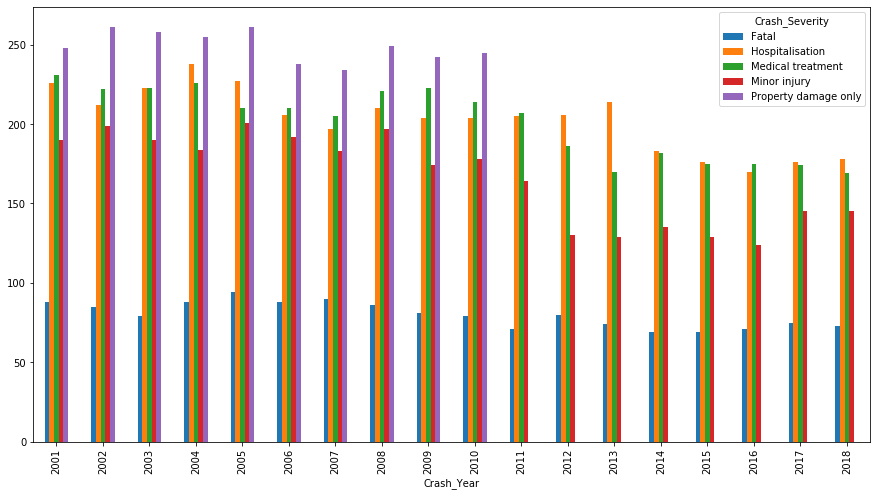

In [31]:
df.plot(x="Crash_Year", 
        y=["Fatal", "Hospitalisation", "Medical treatment", "Minor injury", "Property damage only"], 
        kind="bar", 
        figsize=(15, 8))

In [41]:
df = data[['Crash_Year', 'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised', 'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury', 'Count_Casualty_All']]
print("df.shape:", df.shape)
print(list(df))
print(df.head(5))

df.shape: (14198, 6)
['Crash_Year', 'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised', 'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury', 'Count_Casualty_All']
   Crash_Year  Count_Casualty_Fatality  Count_Casualty_Hospitalised  \
0        2001                        1                            0   
1        2001                        5                            1   
2        2001                        4                            0   
3        2001                        1                            0   
4        2001                        1                            1   

   Count_Casualty_MedicallyTreated  Count_Casualty_MinorInjury  \
0                                0                           0   
1                                0                           0   
2                                2                           0   
3                                0                           0   
4                                0                           0

In [42]:
crashes_yr_injury_type = df.groupby(['Crash_Year', 'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised', 'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury', 'Count_Casualty_All']).size().to_frame('count').reset_index()
crashes_yr_injury_type.head(5)

,Crash_Year,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All,count
0,2001,0,0,0,0,0,248
1,2001,0,0,0,1,1,29
2,2001,0,0,0,2,2,19
3,2001,0,0,0,3,3,20
4,2001,0,0,0,4,4,18


In [ ]:
#crashes_yr_injury_type = df.groupby(['Crash_Year']).size().to_frame('count').reset_index()
print("crashes_yr_injury_type.head()\n", crashes_yr_injury_type.head())

In [46]:
df = data[['Crash_Year', 'Involving_Male_Driver', 'Involving_Female_Driver', 'Involving_Young_Driver_16-24', 'Involving_Senior_Driver_60plus', 'Involving_Provisional_Driver', 'Involving_Overseas_Licensed_Driver', 'Involving_Unlicensed_Driver', 'Count_Crashes']]
df.shape

(14198, 9)

In [47]:
crashes_yr_driver_type = df.groupby(['Crash_Year', 'Involving_Male_Driver', 'Involving_Female_Driver', 'Involving_Young_Driver_16-24', 'Involving_Senior_Driver_60plus', 'Involving_Provisional_Driver', 'Involving_Overseas_Licensed_Driver', 'Involving_Unlicensed_Driver', 'Count_Crashes']).size().to_frame('count').reset_index()
crashes_yr_driver_type.head()

,Crash_Year,Involving_Male_Driver,Involving_Female_Driver,Involving_Young_Driver_16-24,Involving_Senior_Driver_60plus,Involving_Provisional_Driver,Involving_Overseas_Licensed_Driver,Involving_Unlicensed_Driver,Count_Crashes,count
0,2001,No,No,No,No,No,No,No,1,4
1,2001,No,No,No,No,No,No,No,3,4
2,2001,No,No,No,No,No,No,No,4,1
3,2001,No,No,No,No,No,No,No,6,1
4,2001,No,No,No,No,No,No,No,8,2
